In [2]:
from os import path
from config import TYPE, SIZE, EMBEDDING_PATH

from load_data.wdc.load_wdc_dataset import EnglishDatasetLoader
from utils.levenshtein_distance import compute_lev_dist_for_pairs
from emb_extr_res.emb_extr_res import get_embeddings_df
from utils.visualization import plot_histogram
from probing.similarity_pairs_probing.get_data import get_pair_similarity_probing_task_df

import pandas as pd
import numpy as np


# Probing task: similarity

### a) similarity of offers used in training (training set) 

Loading training dataset

In [3]:
df_train = EnglishDatasetLoader.load_train(type=TYPE, size=SIZE)

Computing Levenshtein Distance for each pair - a new target variable for this probing task

In [4]:
df_train['title_lev_dist'] = compute_lev_dist_for_pairs(df_train)

Choosing the best bins for discretization of the new target variable - similarity score of each pair

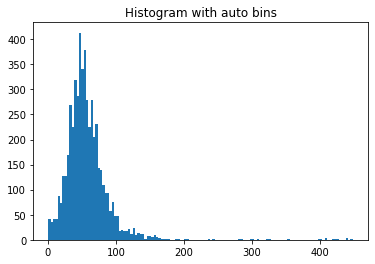

In [5]:
plot_histogram(df_train['title_lev_dist'].values, bins='auto')

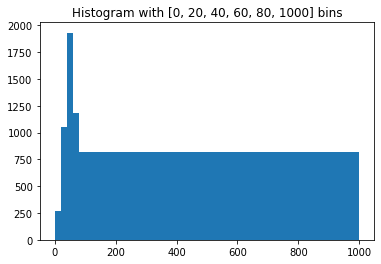

In [6]:
bins = [0, 20, 40, 60, 80, 1000]
plot_histogram(df_train['title_lev_dist'].values, bins=bins)

Discretize the target variable

In [7]:
df_train['title_lev_dist'] = pd.cut(x=df_train['title_lev_dist'], bins=bins, labels=[0, 1, 2, 3, 4])
df_train['title_lev_dist']

0       3
1       2
2       0
3       3
4       2
       ..
5250    2
5251    2
5252    1
5253    1
5254    2
Name: title_lev_dist, Length: 5255, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

Get embeddings result data frame:

In [8]:
train_embeddings_path = path.join(EMBEDDING_PATH, r'train_embeddings.csv')
embedding_train_df = get_embeddings_df(train_embeddings_path)

In [9]:
df = get_pair_similarity_probing_task_df(df_train, embedding_train_df)

In [10]:
df.head()

,title_lev_dist,left_id,left_0,left_1,left_2,left_3,left_4,left_5,left_6,left_7,...,right_758,right_759,right_760,right_761,right_762,right_763,right_764,right_765,right_766,right_767
0,3,12939297,-0.149791,1.071217,0.187230,-0.139591,-0.807871,-0.046871,-0.418031,-0.100208,...,0.797846,-0.080050,-0.185518,0.397698,-0.138480,-1.232638,-0.162692,0.073755,0.053071,-1.146569
2,2,17100990,-0.047905,1.216980,0.245378,-0.004205,-0.797601,0.002864,-0.316836,-0.107791,...,0.897925,-0.188297,-0.243057,0.478510,-0.081364,-1.289565,0.149673,0.150715,0.095488,-1.226075
3,1,17100990,-0.047905,1.216980,0.245378,-0.004205,-0.797601,0.002864,-0.316836,-0.107791,...,0.368393,0.189557,-0.478091,-0.293820,-0.887781,0.900259,0.227131,0.367114,0.561405,-0.056190
4,0,16638707,0.067015,-0.674859,0.512917,-0.328953,-0.683486,-0.473680,0.242210,-0.825564,...,0.368393,0.189557,-0.478091,-0.293820,-0.887781,0.900259,0.227131,0.367114,0.561405,-0.056190
5,4,8030713,-0.648637,-0.043288,0.583120,-0.672200,-0.752488,-0.265190,-0.026415,-0.275188,...,0.368393,0.189557,-0.478091,-0.293820,-0.887781,0.900259,0.227131,0.367114,0.561405,-0.056190


modeling 

In [11]:
# TO DO

results

In [12]:
# TO DO

***


### b) similarity of offers not used in training (test set) 

Loading training dataset

In [13]:
df_test = EnglishDatasetLoader.load_test(type=TYPE)

Computing Levenshtein Distance for each pair - a new target variable for this probing task

In [14]:
df_test['title_lev_dist'] = compute_lev_dist_for_pairs(df_test)

Choosing the best bins for discretization of the new target variable - similarity score of each pair

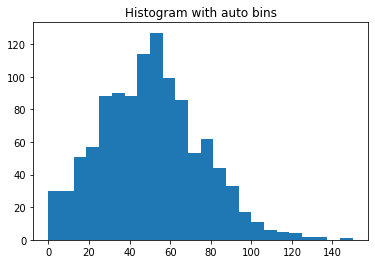

In [15]:
plot_histogram(df_test['title_lev_dist'].values, bins='auto')

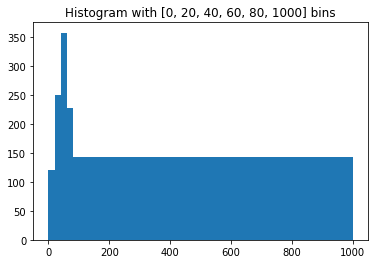

In [16]:
bins = [0, 20, 40, 60, 80, 1000]
plot_histogram(df_test['title_lev_dist'].values, bins=bins)

Discretize the target variable

In [17]:
df_test['title_lev_dist'] = pd.cut(x=df_test['title_lev_dist'], bins=bins, labels=[0, 1, 2, 3, 4])
df_test['title_lev_dist']

0       0
1       1
2       1
3       1
4       1
       ..
1095    2
1096    3
1097    3
1098    3
1099    1
Name: title_lev_dist, Length: 1100, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

Get embeddings result data frame:

In [18]:
test_embeddings_path = path.join(EMBEDDING_PATH, r'test_embeddings.csv')
embedding_test_df = get_embeddings_df(test_embeddings_path)

In [23]:
df = get_pair_similarity_probing_task_df(df_test, embedding_test_df)
df.head()

,title_lev_dist,left_id,left_0,left_1,left_2,left_3,left_4,left_5,left_6,left_7,...,right_758,right_759,right_760,right_761,right_762,right_763,right_764,right_765,right_766,right_767
0,0,8571506,0.550398,-0.526154,0.082125,0.444099,0.053268,-0.345504,-0.084409,0.096725,...,0.300989,0.605257,-0.031447,0.055329,0.581134,-0.562669,-0.185219,-0.150309,0.547994,0.673631
2,1,8571506,0.550398,-0.526154,0.082125,0.444099,0.053268,-0.345504,-0.084409,0.096725,...,-0.567429,0.363189,-0.289208,-0.063081,-0.901390,-0.405271,0.049443,0.515929,-0.140260,-0.624937
3,1,8571506,0.550398,-0.526154,0.082125,0.444099,0.053268,-0.345504,-0.084409,0.096725,...,-1.015687,-0.076606,-0.227819,-0.420046,-0.208214,-0.679192,0.195318,-0.276532,-0.493191,-0.406144
4,1,11809928,-0.302815,-0.326458,-0.213350,0.392424,-0.177313,0.885198,0.045655,0.018103,...,-1.015687,-0.076606,-0.227819,-0.420046,-0.208214,-0.679192,0.195318,-0.276532,-0.493191,-0.406144
5,1,8571506,0.550398,-0.526154,0.082125,0.444099,0.053268,-0.345504,-0.084409,0.096725,...,0.367300,0.102650,-0.348079,-0.934553,-0.089702,-0.820126,0.130514,1.331819,0.021485,-0.814547


modeling 

In [21]:
# TO DO

results

In [22]:
# TO DO